### Pandas 객체(자료구조)
- 1차원 : 시리즈(Series)
- 2차원 : 데이터프레임(DataFrame)

In [1]:
import pandas as pd
# pandas 모듈을 불러와서 pd라고 부르겠다.

In [2]:
# 1차원 시리즈 생성
# list이용
# 도시별 인구수 나타내는 Series 생성
population = pd.Series([9602000,3344000,1488000,2419000])
population

0    9602000
1    3344000
2    1488000
3    2419000
dtype: int64

In [3]:
# 시리즈 데이터에 인덱스를 지정하여 생성
population = pd.Series([9602000,3344000,1488000,2419000],
                      index = ['서울','부산','광주','대구'])
population

서울    9602000
부산    3344000
광주    1488000
대구    2419000
dtype: int64

In [4]:
# 딕셔너리를 이용해서 Series 생성하기
# 면적에 대한 정보 생성
# 딕셔너리명 = {'key1':value1}
area = pd.Series({'서울':605.2,'부산':770.1,'광주':501.1,'대구':883.5})
area

서울    605.2
부산    770.1
광주    501.1
대구    883.5
dtype: float64

In [5]:
# 1. value 값만 확인하고 싶을 때
population.values # 출력결과의 형태 --> numpy 배열

array([9602000, 3344000, 1488000, 2419000], dtype=int64)

In [6]:
# 2. 시리즈의 인덱스 값을 확인하고 싶을 때
population.index # object ==> 문자열 자료형

Index(['서울', '부산', '광주', '대구'], dtype='object')

In [7]:
population.dtype
area.dtype

dtype('float64')

#### 시리즈(Series) 이름 지정
- 시리즈의 이름 DataFrame의 컬럼명이 된다

In [8]:
population.name = '2020 인구'
population

서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

In [9]:
population.index.name = '도시'
population

도시
서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

In [10]:
population.index.name = '지역'

In [11]:
population

지역
서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

#### 시리즈 데이터 갱신, 삭제 , 추가

In [68]:
# 갱신(수정) ==> 1. 인덱스 위치 접근 2. 값을 대입
population['대전'] = 2419000
population

도시
서울    9602000
부산    3500000
광주    1488000
대구    2419000
전주    2419000
인천    2951000
대전    2419000
Name: 2020 인구, dtype: int64

In [13]:
# 삭제 : drop()
# population('부산', inplace=True) # 데이터를 삭제하고 원래 위치에 반영
# inplace의 기본값은 False
# population = population.drop('부산') # 삭제한 결과를 원래의 변수에 대입
#population = population.drop('부산')

In [14]:
population

지역
서울    9602000
부산    3500000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

In [15]:
# 추가 : 없는 키 값을 불러주고 값을 대입
# '전주' : 1400000
population['전주'] = 1400000

In [16]:
population

지역
서울    9602000
부산    3500000
광주    1488000
대구    2419000
전주    1400000
Name: 2020 인구, dtype: int64

In [17]:
population.index.name = '도시'
population['인천'] = 2951000
population

도시
서울    9602000
부산    3500000
광주    1488000
대구    2419000
전주    1400000
인천    2951000
Name: 2020 인구, dtype: int64

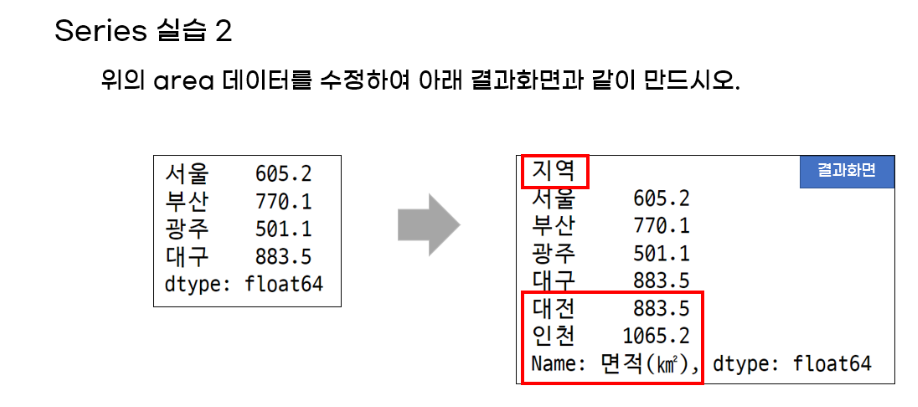

In [18]:
area

서울    605.2
부산    770.1
광주    501.1
대구    883.5
dtype: float64

In [67]:
area.index.name = '지역'
area.name = '면적(㎦)'
area['전주'] = 883.5
area['인천'] = 1065.2

In [20]:
area

지역
서울     605.2
부산     770.1
광주     501.1
대구     883.5
대전     883.5
인천    1065.2
Name: 면적(㎦), dtype: float64

#### 시리즈 병합(concat)
- 1차원을 연결하여 2차원으로 변환
- 시리즈의 이름이 데이터프레임의 컬럼명이 됨

In [21]:
# axis = 0 : 행방향  ↓
# axis = 1 : 열방향  →
df = pd.concat([population, area])
df

서울    9602000.0
부산    3500000.0
광주    1488000.0
대구    2419000.0
전주    1400000.0
인천    2951000.0
서울        605.2
부산        770.1
광주        501.1
대구        883.5
대전        883.5
인천       1065.2
dtype: float64

In [76]:
# 열방향으로 병합
df2 = pd.concat([population, area], axis = 1)
df2

,2020 인구,면적(㎦)
서울,9602000,605.2
부산,3500000,770.1
광주,1488000,501.1
대구,2419000,883.5
전주,2419000,883.5
인천,2951000,1065.2
대전,2419000,883.5


#### 2차원 데이터프레임(DataFrame) 생성

In [23]:
# list 이용 데이터프레임 생성
data = [[1488000, 501.1],[2419000,883.5],[1400000,883.5],[2951000,1065.2]]
df3 = pd.DataFrame(data)
df3

,0,1
0,1488000,501.1
1,2419000,883.5
2,1400000,883.5
3,2951000,1065.2


In [24]:
# 인덱스명,컬럼명 설정
df3 = pd.DataFrame(data, index = ['광주','대구','전주','인천'],
                    columns = ['2020 인구','면적(㎢)'])
df3

,2020 인구,면적(㎢)
광주,1488000,501.1
대구,2419000,883.5
전주,1400000,883.5
인천,2951000,1065.2


In [25]:
# 딕셔너리를 이용하여 데이터프레임 생성
data = {'2020 인구' :[1488000,2419000,1400000,2951000],
       "면적(㎢)":[501.1,883.5,883.5,1065.2]}
df4 = pd.DataFrame(data, index = ['광주','대구','전주','인천'])
df4

,2020 인구,면적(㎢)
광주,1488000,501.1
대구,2419000,883.5
전주,1400000,883.5
인천,2951000,1065.2


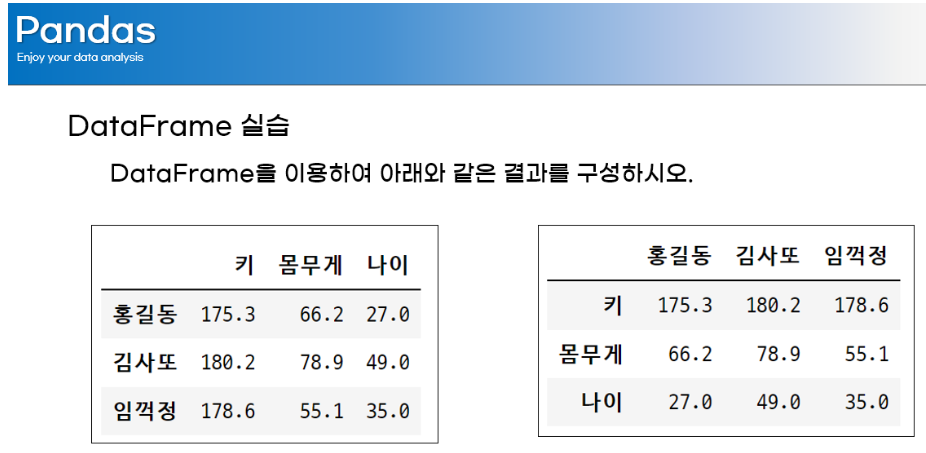

In [26]:
data = {'키' :[175.3,180.2,178.6],
       "몸무게":[66.2,78.9,55.1],
       '나이':[27.0,49.0,35.0]}
df5 = pd.DataFrame(data, index = ['홍길동','김사또','임꺽정'])
df5

,키,몸무게,나이
홍길동,175.3,66.2,27.0
김사또,180.2,78.9,49.0
임꺽정,178.6,55.1,35.0


In [27]:
# 행과 열을 전환하는 키워드 .T(전치 - transpose)
df5_T=df5.T
df5_T

,홍길동,김사또,임꺽정
키,175.3,180.2,178.6
몸무게,66.2,78.9,55.1
나이,27.0,49.0,35.0


### Pandas 데이터 접근하기 : 인덱싱 & 슬라이싱

#### 시리즈 인덱싱

In [28]:
stud1 = pd.Series({'java':95,'python':100,'db':85,'html/css':70})
stud1

java         95
python      100
db           85
html/css     70
dtype: int64

In [29]:
# 인덱싱 --> java 데이터에 접근
stud1['java']
stud1[0]

95

In [30]:
# html/css 데이터에 접근
stud1['html/css']
stud1[3]

70

In [31]:
# 여러개의 데이터를 한번에 인덱싱하기
# java, db
stud1[0:3:2]
stud1[['java','db']]

java    95
db      85
dtype: int64

In [32]:
# 파이썬부터 html/css 접근
stud1[1:]

python      100
db           85
html/css     70
dtype: int64

In [33]:
display(stud1[:2])
display(stud1[1:]) # display() 프린트 출력문 한칸 띄워줌

java       95
python    100
dtype: int64

python      100
db           85
html/css     70
dtype: int64

#### 시리즈 블리언 인덱싱


In [34]:
# 데이터 안에서 85점 이상인 과목 확인하기
stud1[stud1 >=85]

java       95
python    100
db         85
dtype: int64

In [35]:
stud1[stud1 >=85].index

Index(['java', 'python', 'db'], dtype='object')

In [36]:
# 데이터 안에서 90점 이상인 과목 확인하기 
stud1[stud1 >=90].index

Index(['java', 'python'], dtype='object')

In [37]:
# 75점 이상 90점 미만인 과목 접근하기 (두 개의 조건을 연결 - 비트 연산 )
stud1[(stud1 >= 75) & (stud1 < 90)].index

Index(['db'], dtype='object')

#### 2차원 데이터프레임 데이터 접근

In [38]:
df_stud = pd.DataFrame({'java':[95,85],'python':[100,95],'db':[85,85],'html/css':[70,75]},
                       index = ['hc','jh'])

In [39]:
df_stud

,java,python,db,html/css
hc,95,100,85,70
jh,85,95,85,75


In [40]:
# python 성적 데이터 접근
df_stud['python'] # 1차원
# 2차원에서 []열고 값을 입력하면 컬럼이라고 인식

hc    100
jh     95
Name: python, dtype: int64

In [41]:
df_stud[['db']]
#데이터 프레임으로 출력하고자 하면 [[]]

,db
hc,85
jh,85


In [42]:
# 여러개의 컬럼 데이터 접근
# java, python 데이터접근
# [] 행데이터 [[]] 열데이터
df_stud[['java','python']]

,java,python
hc,95,100
jh,85,95


In [43]:
# python 에서 html/css까지 접근
# df_stud[컬럼명]
# df_stud[값:값] ==> 행으로 접근
df_stud['python':'html/css']
df_stud['hc':'jh']# 행인덱싱

,java,python,db,html/css
hc,95,100,85,70
jh,85,95,85,75


#### ★★loc,iloc 인덱서
- loc 인덱서
    - 문자열 기반 데이터 접근
    - 행접근 : df.loc[행], df.loc[시작행:끝행], df.loc[[행1,행2,행3]]
    - 열접근 : df.loc[:,열], df.loc[:, 시작열:끝열], df.loc[:,[열1,열2,열3]]
- iloc 인덱서
    - numpy array에서 제공하는 인덱스번호 기반으로 데이터 접근(눈에 보이지 않는 인덱스에도 접근)
    - 행접근 : df.iloc[행인덱스] df.iloc[시작행인덱스:끝행인덱스],df.iloc[[행1인덱스,행2인덱스,행3인덱스]]
    - 열접근 : df.iloc[:,열인덱스], df.iloc[:,시작열인덱스:끝열인덱스],df.iloc[:,[열1인덱스,열2인덱스]]
- 배열.loc[행,열], 배열iloc[행,열]
- loc :location 위치
- iloc : int location 인덱스 번호 위치

In [44]:
df_stud

,java,python,db,html/css
hc,95,100,85,70
jh,85,95,85,75


In [45]:
# db컬럼에 접근
display(df_stud.loc[:,'db'])
display(df_stud.iloc[:,2])

hc    85
jh    85
Name: db, dtype: int64

hc    85
jh    85
Name: db, dtype: int64

In [46]:
# java 과목에 접근해보기
display(df_stud.loc[:,'java'])
display(df_stud.iloc[:,0])

hc    95
jh    85
Name: java, dtype: int64

hc    95
jh    85
Name: java, dtype: int64

In [47]:
# python에서 db 까지 과목 성적 접근하기
display(df_stud.loc[:,'python':'db'])
display(df_stud.iloc[:,1:3])
df_stud[['python','db']]# 컬럼

,python,db
hc,100,85
jh,95,85


,python,db
hc,100,85
jh,95,85


,python,db
hc,100,85
jh,95,85


In [48]:
# 행 접근
# 효창씨의 데이터 접근
# loc
df_stud.loc['hc']
# iloc
df_stud.iloc[0]

java         95
python      100
db           85
html/css     70
Name: hc, dtype: int64

In [49]:
# 데이터 프레임을 종현 효창 순서로 보이게 출력해보기
df_stud.loc[['jh','hc']]
df_stud.iloc[[1,0]]

,java,python,db,html/css
jh,85,95,85,75
hc,95,100,85,70


#### 데이터프레임 블리언 인덱싱

In [50]:
# python 의 성적이 95점 이상인 사람의 수는 몇 명일까?
df_stud[df_stud['python'] >= 95].shape[0] # 행의 갯수 배열의 크기로 확인

2

In [51]:
len(df_stud[df_stud['python'] >= 95].index) # 인덱스로 접근해서 길이함수 이용

2

In [52]:
df_stud[df_stud['python'] >= 95].index.size # 인덱스의 요소 갯수로 확인

2

In [53]:
df_stud.iloc[:,1]

hc    100
jh     95
Name: python, dtype: int64

In [54]:
# java 85점 이상인 사람의 html/css 점수 철력해보기
df_stud[df_stud.loc[:,'java'] >=85]['html/css']
df_stud[df_stud.loc[:,'java'] >=85].loc[:,'html/css']
df_stud[df_stud.loc[:,'java'] >=85].iloc[:,-1]
df_stud.loc[df_stud.loc[:,'java'] >=85,'html/css']

hc    70
jh    75
Name: html/css, dtype: int64

### 시리즈간 연산

In [55]:
population

도시
서울    9602000
부산    3500000
광주    1488000
대구    2419000
전주    1400000
인천    2951000
Name: 2020 인구, dtype: int64

In [56]:
area

지역
서울     605.2
부산     770.1
광주     501.1
대구     883.5
대전     883.5
인천    1065.2
Name: 면적(㎦), dtype: float64

In [63]:
# 연산 수행하기
population + area
population - area
population * area

광주    7.456368e+08
대구    2.137186e+09
대전    2.137186e+09
부산    2.695350e+09
서울    5.811130e+09
인천    3.143405e+09
전주             NaN
dtype: float64

In [77]:
df2

,2020 인구,면적(㎦)
서울,9602000,605.2
부산,3500000,770.1
광주,1488000,501.1
대구,2419000,883.5
전주,2419000,883.5
인천,2951000,1065.2
대전,2419000,883.5


In [80]:
# 인구밀도 = 인구수 / 면적
# df2 데이터 프레임에 컬럼 추가하기
dense = population / area
df2['인구밀도'] = dense

In [81]:
df2

,2020 인구,면적(㎦),인구밀도
서울,9602000,605.2,15865.829478
부산,3500000,770.1,4544.864303
광주,1488000,501.1,2969.467172
대구,2419000,883.5,2737.973967
전주,2419000,883.5,2737.973967
인천,2951000,1065.2,2770.371761
대전,2419000,883.5,2737.973967


### 유용한 함수

#### 데이터 정렬함수
- sort_value : 데이터 값을 기준으로 정렬(기본값 : 오름차순)
- sort_index : 인덱스 값을 기준으로 정렬

In [86]:
#ascending=True,or False로 오름차순 내림차순
df2['인구밀도'].sort_values(ascending=False) 


서울    15865.829478
부산     4544.864303
광주     2969.467172
인천     2770.371761
대구     2737.973967
전주     2737.973967
대전     2737.973967
Name: 인구밀도, dtype: float64

In [88]:
# 인덱스정렬
# 인덱스 순서대로 정렬됨
df2['인구밀도'].sort_index()

광주     2969.467172
대구     2737.973967
대전     2737.973967
부산     4544.864303
서울    15865.829478
인천     2770.371761
전주     2737.973967
Name: 인구밀도, dtype: float64

In [89]:
# 데이터의 컬럼명을 확인하는 키워드
df2.columns

Index(['2020 인구', '면적(㎦)', '인구밀도'], dtype='object')

In [91]:
df2

,2020 인구,면적(㎦),인구밀도
서울,9602000,605.2,15865.829478
부산,3500000,770.1,4544.864303
광주,1488000,501.1,2969.467172
대구,2419000,883.5,2737.973967
전주,2419000,883.5,2737.973967
인천,2951000,1065.2,2770.371761
대전,2419000,883.5,2737.973967


In [92]:
# 2차원 데이터 value 정렬
df2.sort_values(by = ['면적(㎦)','2020 인구'],ascending=False)

,2020 인구,면적(㎦),인구밀도
인천,2951000,1065.2,2770.371761
대구,2419000,883.5,2737.973967
전주,2419000,883.5,2737.973967
대전,2419000,883.5,2737.973967
부산,3500000,770.1,4544.864303
서울,9602000,605.2,15865.829478
광주,1488000,501.1,2969.467172


#### 카운팅하는 함수

In [93]:
df2['면적(㎦)'].value_counts()

883.5     3
605.2     1
770.1     1
501.1     1
1065.2    1
Name: 면적(㎦), dtype: int64

In [94]:
# 데이터에만 접근
df2['면적(㎦)'].value_counts().values

array([3, 1, 1, 1, 1], dtype=int64)

#### 데이터 삭제하는 함수

In [97]:
# axis = 0 행방향 1 열방향
df2.drop('인구밀도' , axis = 1, inplace = True) 
# inplace = True 는 기존데이터에 반영하겠다 없으면 그대로있음

In [98]:
df2

,2020 인구,면적(㎦)
서울,9602000,605.2
부산,3500000,770.1
광주,1488000,501.1
대구,2419000,883.5
전주,2419000,883.5
인천,2951000,1065.2
대전,2419000,883.5


In [101]:
# 서울 데이터 삭제해보기
df2.drop('서울', inplace =True)

In [102]:
df2

,2020 인구,면적(㎦)
부산,3500000,770.1
광주,1488000,501.1
대구,2419000,883.5
전주,2419000,883.5
인천,2951000,1065.2
대전,2419000,883.5


In [105]:
# 여러 개 (전주, 인천)을 지우고 싶을 때
df2.drop(['전주','인천'], inplace =True)

In [107]:
df2

,2020 인구,면적(㎦)
부산,3500000,770.1
광주,1488000,501.1
대구,2419000,883.5
대전,2419000,883.5


#### 데이터 불러오는 함수

In [179]:
# 한글 불러오는 encoding 방식 : cp949, utf-8, euc-kr
score = pd.read_csv('data/score.csv',
            index_col = '과목',
            encoding='euc-kr')

In [180]:
score

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [118]:
# 데이터 확인하기
# 크기 확인 : shape
score.shape
# 데이터 타입
# 데이터프레임의 데이터 타입 확인은 각각의 데이터로 접근해야한다.
score['1반'].dtype
# 컬럼명(이름) 확인
score.columns
# 행이름
score.index

Index(['수학', '영어', '국어', '사회', '과학'], dtype='object', name='과목')

#### 데이터 정보 출력하는 함수

In [119]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 수학 to 과학
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1반      5 non-null      int64
 1   2반      5 non-null      int64
 2   3반      5 non-null      int64
 3   4반      5 non-null      int64
dtypes: int64(4)
memory usage: 200.0+ bytes


In [121]:
# 결측치 개수 확인해보기
score.isnull().sum()

1반    0
2반    0
3반    0
4반    0
dtype: int64

#### 결측치인지 아닌지 확인하는 함수


In [122]:
score.isnull()
# 결측치 O : True
# 결측치 X : False

,1반,2반,3반,4반
과목,,,,
수학,False,False,False,False
영어,False,False,False,False
국어,False,False,False,False
사회,False,False,False,False
과학,False,False,False,False


#### 총합을 구하는 함수

In [124]:
score.isnull().sum(axis = 1)

과목
수학    0
영어    0
국어    0
사회    0
과학    0
dtype: int64

#### 학급별 순위(성적이 높은 순부터)

In [137]:
score1 =score.sum(axis = 1)
score1

과목
수학    201.0
영어    282.0
국어    253.0
사회    298.0
과학    163.0
dtype: float64

In [131]:
score1.sort_values(ascending = False)

2반    388
3반    295
1반    271
4반    243
dtype: int64

#### 과목별 합계를 계산해서 합계컬럼으로 추가하기

In [181]:
score['합계'] = score.sum(axis = 1)

In [141]:
score.drop('합계',axis =1, inplace = True)

In [182]:
score

,1반,2반,3반,4반,합계
과목,,,,,
수학,45,44,73,39,201
영어,76,92,45,69,282
국어,47,92,45,69,253
사회,92,81,85,40,298
과학,11,79,47,26,163


#### 과목별 평균을 계산하여 컬럼 추가하기

In [183]:
score['평균'] = score.iloc[:,:4].sum(axis = 1)/4

In [171]:
score['합계']/len(score.columns[:4])

과목
수학    50.25
영어    70.50
국어    63.25
사회    74.50
과학    40.75
Name: 합계, dtype: float64

In [184]:
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45,44,73,39,201,50.25
영어,76,92,45,69,282,70.50
국어,47,92,45,69,253,63.25
사회,92,81,85,40,298,74.50
과학,11,79,47,26,163,40.75


#### 반 평균 계산해서 새로운 행으로 추가하기

In [194]:
score.loc['반평균'] = score.mean()

In [195]:
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,239.4,59.85


#### 최대값 최소값 구하는 함수

In [198]:
# max()
score.max(axis =1)
score.min()

1반     11.00
2반     44.00
3반     45.00
4반     26.00
합계    163.00
평균     40.75
dtype: float64

#### 1~4반까지 점수중 과목별 가장 큰 값과 가장 작은 값의 차를 구하시오

In [206]:
score.iloc[:5,:4].max(axis = 1) - score.iloc[:5,:4].min(axis = 1)

과목
수학    34.0
영어    47.0
국어    47.0
사회    52.0
과학    68.0
dtype: float64

#### cut 함수 : 수치형 데이터 -> 범주형 데이터

In [215]:
ages = [0,2,10,21,23,37,31,61,20,41,32,100]
bins = [-1,15,30,40,60,100] # 구간 설정
labels = ['미성년자','청년','장년','중년','노년']
cats = pd.cut(ages, bins=bins,labels=labels)
cats
pd.Series(cats)

0     미성년자
1     미성년자
2     미성년자
3       청년
4       청년
5       장년
6       장년
7       노년
8       청년
9       중년
10      장년
11      노년
dtype: category
Categories (5, object): ['미성년자' < '청년' < '장년' < '중년' < '노년']

#### groupby() 데이터를 그룹별로 묶어 집계낼 수 있게 하는 함수

In [221]:
s1 = pd.Series([1,0,1,0,1])
s2 = pd.Series(['female','female','male','male','female'])
s3 = pd.Series([1,2,3,4,5])

ti = pd.concat([s1,s2,s3],axis = 1)
ti.columns = ['Servived','Sex','PassengerID']
ti

,Servived,Sex,PassengerID
0,1,female,1
1,0,female,2
2,1,male,3
3,0,male,4
4,1,female,5


In [227]:
# 성별에 따른 생존자 수 확인하기
ti[['Servived','Sex']].groupby('Sex').sum() # 성별을 기준으로 묶어서 결과를 반환

,Servived
Sex,
female,2
male,1


In [248]:
# 성별에 따른 생존자수 / 사망자 수 확인하기
ti.groupby(by =['Sex','Servived']).count()


PassengerID
Sex    Servived             
female 0                   1
       1                   2
male   0                   1
       1                   1